In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.api.types import is_string_dtype
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS


sns.set()

In [22]:
df = pd.read_csv('data/responses.csv')
df = df.fillna(-1.0)
df.shape

(1010, 150)

In [23]:
def map_data_to_numeric_values(df):
  replace_dict = {}
  for col in df.columns:
    if is_string_dtype(df[col]):
      unique_values = df[col].unique()
      replace_dict[col] = dict(zip(unique_values, range(len(unique_values))))
  return df.replace(replace_dict)

df = map_data_to_numeric_values(df)
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,...,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,...,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,0,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,0,0,0,0,0,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,...,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,0,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,0,0,0,0,1,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,...,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,0,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,0,0,1,0,1,0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,5.0,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,...,1.0,5.0,3.0,1.0,3.0,3.0,2.0,5.0,5.0,4.0,5.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,-1.0,2.0,4.0,1,2.0,4.0,3.0,3.0,4.0,4,1.0,22.0,172.0,59.0,1.0,0,0,0,1,1,1
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,...,4.0,2.0,3.0,3.0,3.0,3.0,5.0,4.0,2.0,3.0,5.0,5.0,2.0,3.0,5.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,0,4.0,3.0,4.0,3.0,3.0,2,4.0,20.0,170.0,59.0,1.0,0,0,1,0,0,1


In [24]:
categories = {}

categories['Music'] = df.columns[range(19)]
categories['Movies'] = df.columns[range(19,31)]
categories['Hobbies'] = df.columns[range(31,63)]
categories['Phobias'] = df.columns[range(63,73)]
categories['Health'] = df.columns[range(73,76)]
categories['Personality'] = df.columns[range(76,133)]
categories['Habits'] = df.columns[range(133,140)]

target = df['Gender']
target

0       0
1       0
2       0
3       0
4       0
       ..
1005    0
1006    1
1007    0
1008    0
1009    1
Name: Gender, Length: 1010, dtype: int64

Logistic Regression

In [25]:
for cat_name, cat_cols in categories.items():
    data = df[cat_cols]
    std = StandardScaler()
    std.fit(data)
    data = std.transform(data)
    logistic_regression = LogisticRegression(C=0.3)
    scores = cross_val_score(logistic_regression, data, target, cv=6)
    print(cat_name, np.mean(scores))

Music 0.69103385930309
Movies 0.8009885413731568
Hobbies 0.854466046773739
Phobias 0.7000739644970414
Health 0.5980264393725933
Personality 0.7821628158166619
Habits 0.688092890015967


The prediction of gender based on hobbies gives the best results. We can say that hobbies are the most gender specific, but movies and personality also give nice scores.

In [26]:
gender_zero_df = df.loc[df['Gender'] == 0]
gender_one_df = df.loc[df['Gender'] == 1]

Hobbies

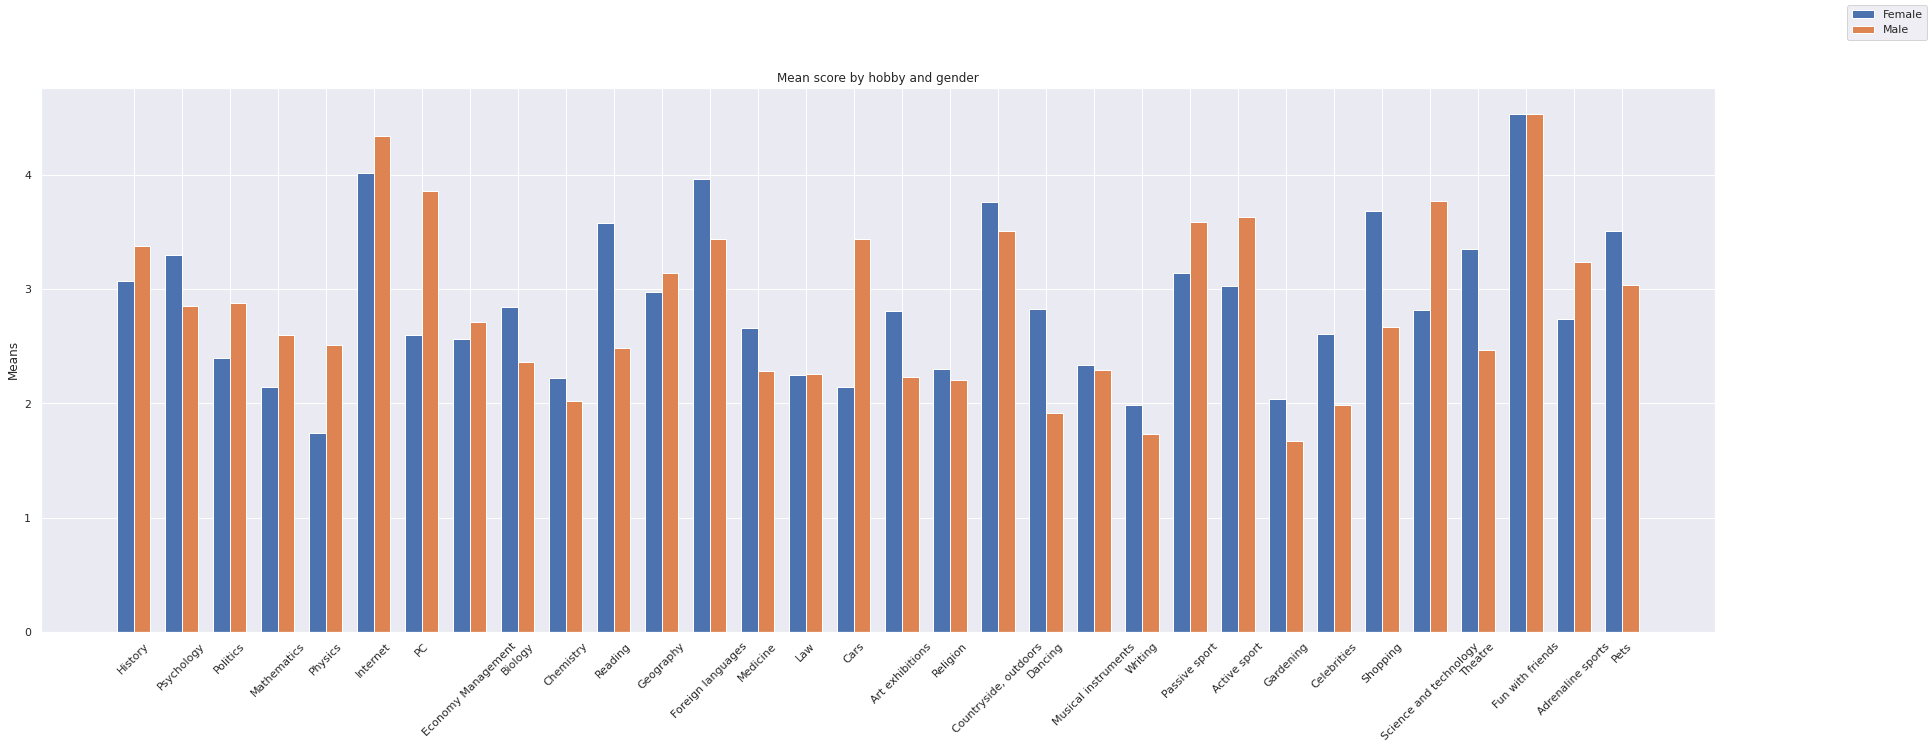

In [27]:
zero_hobbies = gender_zero_df[categories['Hobbies']]
one_hobbies = gender_one_df[categories['Hobbies']]

zero_hobbies_avg = np.mean(zero_hobbies, axis=0)
one_hobbies_avg = np.mean(one_hobbies, axis=0)

ind = np.arange(len(zero_hobbies_avg))  # the x locations for the groups
width = 0.35
fig, ax = plt.subplots(figsize=(30,10))
rects1 = ax.bar(ind - width/2, zero_hobbies_avg, width, label='Female')
rects2 = ax.bar(ind + width/2, one_hobbies_avg, width, label='Male')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Means')
ax.set_title('Mean score by hobby and gender')
ax.set_xticks(ind)
ax.set_xticklabels(categories['Hobbies'], rotation=45)
fig.legend()
fig.show()

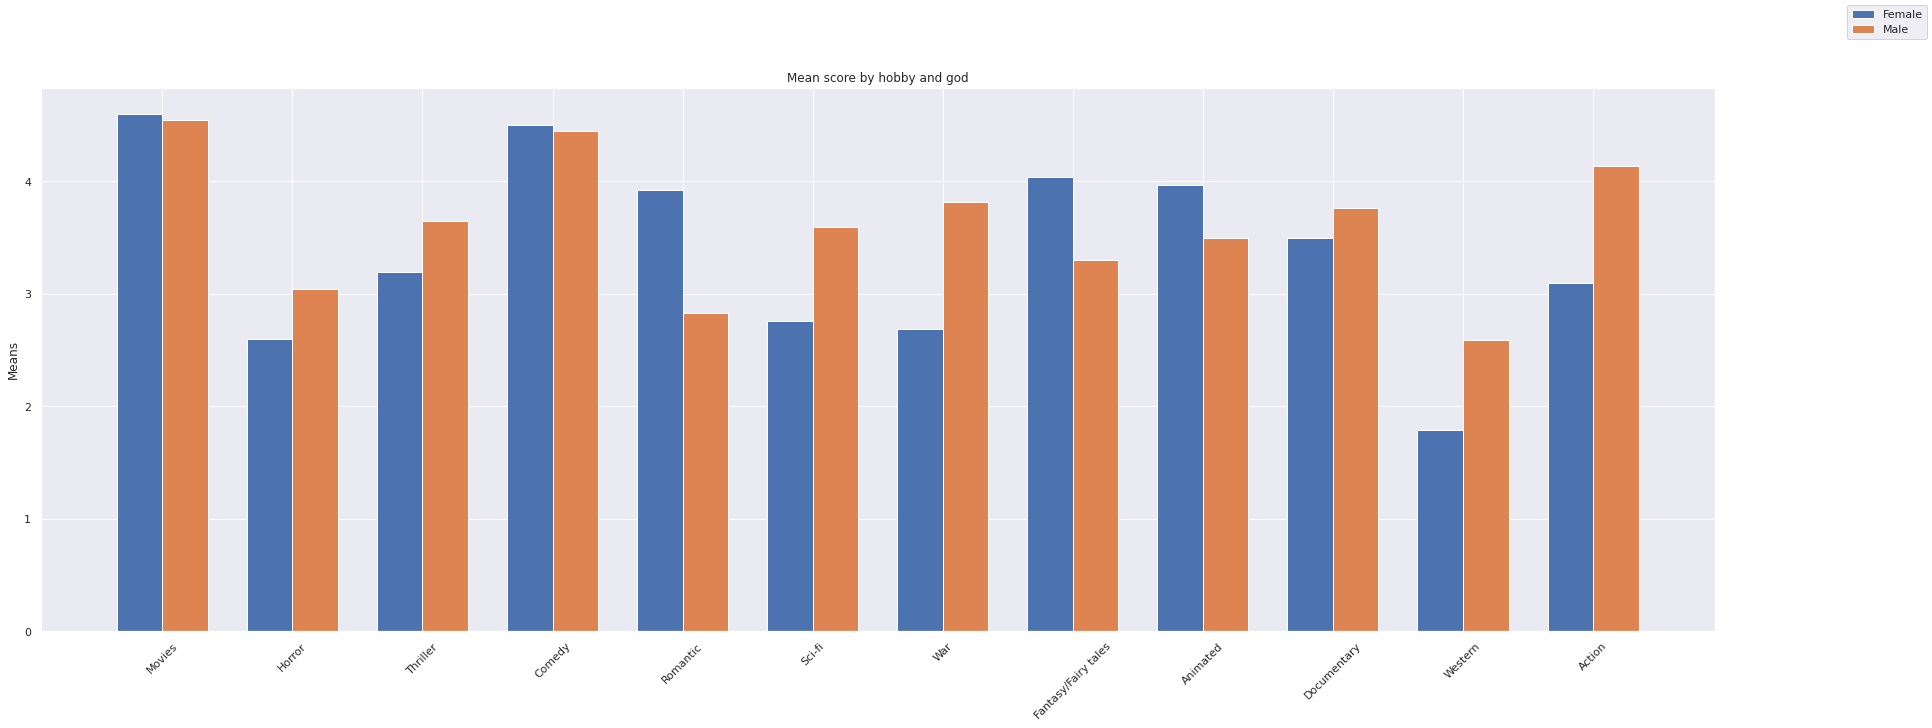

In [29]:
zero_movies = gender_zero_df[categories['Movies']]
one_movies = gender_one_df[categories['Movies']]

zero_movies_avg = np.mean(zero_movies, axis=0)
one_movies_avg = np.mean(one_movies, axis=0)

ind = np.arange(len(zero_movies_avg))  # the x locations for the groups
width = 0.35
fig, ax = plt.subplots(figsize=(30,10))
rects1 = ax.bar(ind - width/2, zero_movies_avg, width, label='Female')
rects2 = ax.bar(ind + width/2, one_movies_avg, width, label='Male')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Means')
ax.set_title('Mean score by hobby and god')
ax.set_xticks(ind)
ax.set_xticklabels(categories['Movies'], rotation=45)
fig.legend()
fig.show()